In [2]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt

In [38]:
GOAL = 100
HEAD_PROB = 0.4

states = np.arange(GOAL+1)

optimal_policies = np.zeros(GOAL+1)
state_values = np.zeros(GOAL+1)
state_values[GOAL] = 1

while True:
    delta = 0.0
    for state in states[1:GOAL]:
        actions = np.arange(min(state, GOAL-state)+1)
        action_returns = []
        for action in actions:
            action_returns.append(HEAD_PROB*state_values[state + action] + (1-HEAD_PROB)*state_values[state-action])
        newValue = np.max(action_returns)
        delta = np.max([delta, np.abs(state_values[state]-newValue)])
        state_values[state] = newValue
    if delta < 1e-9:
        break


In [40]:
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL-state)+1)
    action_returns = []
    for action in actions:
        action_returns.append(HEAD_PROB*state_values[state + action] + (1-HEAD_PROB)*state_values[state-action])
    optimal_policies[state] = actions[np.argmax(action_returns)]

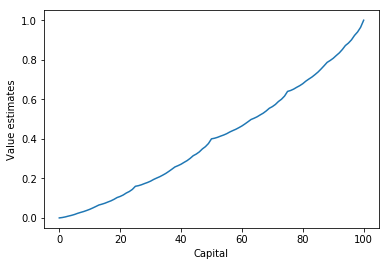

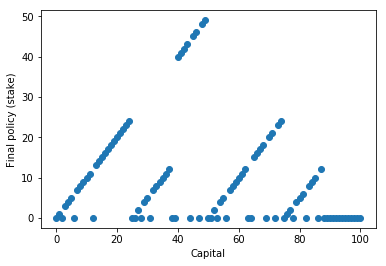

In [43]:
plt.figure(1)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(state_values)
plt.figure(2)
plt.scatter(states, optimal_policies)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()